In [1]:
!pip3 install opencv-python

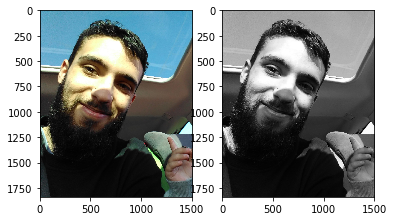

In [8]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

im = cv2.imread("./data/faces/alex_mendez/1.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.imshow(im)
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,2)
plt.imshow(im, cmap="gray")

In [9]:
def loadImageAsGray(imagePath):
    im = cv2.imread(imagePath)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    return im

In [21]:
import glob


def getDataset(path):
    fotos_alumnos = {}

    for fname in glob.glob(path):
        alumno = fname.split('/')[-2]
        print(f"Loading file {fname}")
        if alumno in fotos_alumnos:
            fotos_alumnos[alumno].append(loadImageAsGray(fname))
        else:
            fotos_alumnos[alumno] = [loadImageAsGray(fname)]
    return fotos_alumnos

fotos_alumnos = getDataset('./data/faces/**/*.jpg')

Loading file ./data/faces/guzman_garcia/8.jpg
Loading file ./data/faces/guzman_garcia/9.jpg
Loading file ./data/faces/guzman_garcia/10.jpg
Loading file ./data/faces/guzman_garcia/4.jpg
Loading file ./data/faces/guzman_garcia/5.jpg
Loading file ./data/faces/guzman_garcia/7.jpg
Loading file ./data/faces/guzman_garcia/6.jpg
Loading file ./data/faces/guzman_garcia/2.jpg
Loading file ./data/faces/guzman_garcia/3.jpg
Loading file ./data/faces/guzman_garcia/1.jpg
Loading file ./data/faces/cristina_rota/8.jpg
Loading file ./data/faces/cristina_rota/9.jpg
Loading file ./data/faces/cristina_rota/10.jpg
Loading file ./data/faces/cristina_rota/4.jpg
Loading file ./data/faces/cristina_rota/5.jpg
Loading file ./data/faces/cristina_rota/7.jpg
Loading file ./data/faces/cristina_rota/6.jpg
Loading file ./data/faces/cristina_rota/2.jpg
Loading file ./data/faces/cristina_rota/3.jpg
Loading file ./data/faces/cristina_rota/1.jpg
Loading file ./data/faces/clara_piniella/8.jpg
Loading file ./data/faces/clara

Loading file ./data/faces/javier_gomez/7.jpg
Loading file ./data/faces/javier_gomez/6.jpg
Loading file ./data/faces/javier_gomez/2.jpg
Loading file ./data/faces/javier_gomez/3.jpg
Loading file ./data/faces/javier_gomez/1.jpg
Loading file ./data/faces/blanca_lluch/8.jpg
Loading file ./data/faces/blanca_lluch/9.jpg
Loading file ./data/faces/blanca_lluch/10.jpg
Loading file ./data/faces/blanca_lluch/4.jpg
Loading file ./data/faces/blanca_lluch/5.jpg
Loading file ./data/faces/blanca_lluch/7.jpg
Loading file ./data/faces/blanca_lluch/6.jpg
Loading file ./data/faces/blanca_lluch/2.jpg
Loading file ./data/faces/blanca_lluch/3.jpg
Loading file ./data/faces/blanca_lluch/1.jpg
Loading file ./data/faces/celia_prieto/8.jpg
Loading file ./data/faces/celia_prieto/9.jpg
Loading file ./data/faces/celia_prieto/10.jpg
Loading file ./data/faces/celia_prieto/4.jpg
Loading file ./data/faces/celia_prieto/5.jpg
Loading file ./data/faces/celia_prieto/7.jpg
Loading file ./data/faces/celia_prieto/6.jpg
Loading 

In [47]:
import random
# Comprueba que todos tienen 10 fotos
#list(map(lambda alu: len(fotos_alumnos[alu]) ,fotos_alumnos.keys()))
random.choice(list(fotos_alumnos.keys()))

'cristina_rota'

In [12]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

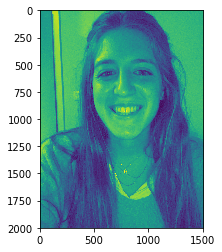

In [15]:
test = fotos_alumnos["blanca_lluch"][0]
plt.imshow(test)

faces = face_cascade.detectMultiScale(test, 1.1, 3)

[437 377 417 417]


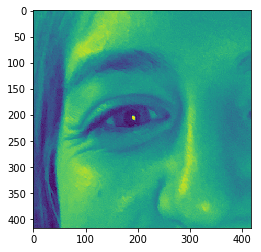

In [20]:
x,y,w,h = faces[0]
print(faces[0])
face = test[y:y+h,x:x+w]
plt.imshow(face)


In [19]:
import os

croped_faces = dict()
for alumnoName, pics in fotos_alumnos.items():
    print(f"Detecting faces for {alumnoName}")
    for i, pic in enumerate(pics):
        try:
            faces = face_cascade.detectMultiScale(pic, 1.1, 3)
            x,y,w,h = faces[0]
            face = pic[y:y+h,x:x+w]
            #https://www.geeksforgeeks.org/python-opencv-cv2-imwrite-method/
            facesdir = f'./data/faces_croped/{alumnoName}'
            filename = f'{facesdir}/{i}.jpg'
            if not os.path.exists(facesdir):
                os.makedirs(facesdir)
            cv2.imwrite(filename, face)
        except Exception as e:
            print(f"No face recognized in pic for {alumnoName}")

croped_faces

Detecting faces for guzman_garcia
Detecting faces for cristina_rota
Detecting faces for clara_piniella
Detecting faces for cesar_castanon
Detecting faces for maria_verdejo
Detecting faces for alberto_vargas
No face recognized in pic for alberto_vargas
Detecting faces for julio_porto
Detecting faces for alvaro_rivas
Detecting faces for seora_kwon
Detecting faces for isa_gallego
Detecting faces for celia_pastor
Detecting faces for david_fernandez
Detecting faces for jorge_lopezmingo
Detecting faces for elena_delafuente
Detecting faces for mario_bru
Detecting faces for juanma_cruz
Detecting faces for antonio_pons
Detecting faces for alex_mendez
Detecting faces for javier_gomez
Detecting faces for blanca_lluch
Detecting faces for celia_prieto
Detecting faces for maika_rodriguez
No face recognized in pic for maika_rodriguez


{}

In [155]:
fotos_alumnos_croped = getDataset('./data/faces_croped/**/*.jpg')

Loading file ./data/faces_croped/guzman_garcia/8.jpg
Loading file ./data/faces_croped/guzman_garcia/9.jpg
Loading file ./data/faces_croped/guzman_garcia/4.jpg
Loading file ./data/faces_croped/guzman_garcia/5.jpg
Loading file ./data/faces_croped/guzman_garcia/7.jpg
Loading file ./data/faces_croped/guzman_garcia/6.jpg
Loading file ./data/faces_croped/guzman_garcia/2.jpg
Loading file ./data/faces_croped/guzman_garcia/3.jpg
Loading file ./data/faces_croped/guzman_garcia/1.jpg
Loading file ./data/faces_croped/guzman_garcia/0.jpg
Loading file ./data/faces_croped/cristina_rota/4.jpg
Loading file ./data/faces_croped/cristina_rota/5.jpg
Loading file ./data/faces_croped/cristina_rota/6.jpg
Loading file ./data/faces_croped/cristina_rota/3.jpg
Loading file ./data/faces_croped/cristina_rota/1.jpg
Loading file ./data/faces_croped/clara_piniella/8.jpg
Loading file ./data/faces_croped/clara_piniella/9.jpg
Loading file ./data/faces_croped/clara_piniella/4.jpg
Loading file ./data/faces_croped/clara_pini

In [175]:
import numpy as np

def extractFeatures(img, numfeats=40):
    fft = np.log10(np.abs(np.fft.fft2(img)))
    w = fft.shape[0]//2
    feats = fft[:numfeats,:numfeats]
    return np.hstack(feats)

mm = extractFeatures(fotos_alumnos_croped['guzman_garcia'][0])
len(mm)


1600

In [176]:
dataset = [(aluName, extractFeatures(pic)) for aluName, pics in fotos_alumnos_croped.items() for pic in pics]

In [178]:
import pandas as pd

def detectFace(imPath):
    # Extract features
    im = loadImageAsGray(imPath)
    faces = face_cascade.detectMultiScale(im, 1.1, 3)
    x,y,w,h = faces[0]
    face = im[y:y+h,x:x+w]
    X_missing = extractFeatures(face)

    # Detect face
    df = pd.DataFrame(dataset, columns=["name","X"])
    df = df[df["X"].apply(lambda X: len(X)==len(X_missing))]
    df.head()
    df["diffs"] = df["X"].apply(lambda X: np.linalg.norm(X-X_missing))
    results = df.groupby("name").agg({'diffs':'min'}).sort_values(by='diffs')
    return results


In [179]:
todetect = [
    './data/faces/missing_1.jpg',
    './data/faces/missing_2.jpg',
    './data/faces/missing_3.jpg',
    './data/faces/missing_4.jpg',
    './data/faces/missing_5.jpg',
]

[detectFace(f).iloc[0] for f in todetect]

[diffs    15.611517
 Name: david_fernandez, dtype: float64, diffs    15.192427
 Name: guzman_garcia, dtype: float64, diffs    18.494245
 Name: mario_bru, dtype: float64, diffs    18.442372
 Name: celia_pastor, dtype: float64, diffs    48.97127
 Name: mario_bru, dtype: float64]